In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Import and clean Football Data

In [18]:
nfl_df = pd.read_csv('https://raw.githubusercontent.com/feliperodriguessd/Projetos/main/nfl_game_scores_1g.csv')
display(nfl_df)

,season,date,away.team,away.score,home.team,home.score,line,over_under
0,2014,2014-09-04,GB,16,SEA,36,-5.0,47.0
1,2014,2014-09-07,NO,34,ATL,37,3.0,51.5
2,2014,2014-09-07,MIN,6,STL,34,-3.0,43.5
3,2014,2014-09-07,CLE,27,PIT,30,-6.0,41.5
4,2014,2014-09-07,JAX,17,PHI,34,-10.0,50.0
...,...,...,...,...,...,...,...,...
529,2015,2016-01-17,SEA,24,CAR,31,-2.5,42.5
530,2015,2016-01-17,PIT,16,DEN,23,-7.5,41.0
531,2015,2016-01-24,NE,18,DEN,20,3.0,44.5
532,2015,2016-01-24,ARI,15,CAR,49,-3.0,47.0


In [19]:
ncaa_df = pd.read_csv('https://raw.githubusercontent.com/feliperodriguessd/Projetos/main/ncaaf_game_scores_1g.csv')
display(ncaa_df)

,season,date,away.team,away.score,home.team,home.score,line,over_under
0,2015,2015-09-03,FIU,15,UCF,14,-12.0,47.0
1,2015,2015-09-03,UNC,17,SC,13,-1.5,62.0
2,2015,2015-09-03,OKST,24,CMU,13,21.5,58.0
3,2015,2015-09-03,VMI,36,BALL,48,-34.5,64.5
4,2015,2015-09-03,ELON,3,WAKE,41,-27.0,40.5
...,...,...,...,...,...,...,...,...
778,2015,2016-01-02,PSU,17,UGA,24,-6.5,44.5
779,2015,2016-01-02,KSU,23,ARK,45,-13.0,56.0
780,2015,2016-01-02,ORE,41,TCU,47,6.5,74.0
781,2015,2016-01-02,WVU,43,ASU,42,1.5,62.5


Checking unique values on year of each dataset

In [20]:
print(nfl_df['season'].unique())
print(ncaa_df['season'].unique())

[2014 2015]
[2015]


In [21]:
common_years = pd.Series(nfl_df['season'].unique())[pd.Series(nfl_df['season'].unique()).isin(pd.Series(ncaa_df['season'].unique()))]


To compare just 2015 ill delete 2014 from the NFL dataset

In [22]:
nfl_df_data_common = nfl_df[nfl_df['season'].isin(common_years)]
ncaa_df_data_common = ncaa_df[ncaa_df['season'].isin(common_years)]

In [23]:
print(nfl_df_data_common.describe())
print(ncaa_df_data_common.describe())

       season  away.score  home.score        line  over_under
count   267.0  267.000000  267.000000  267.000000  267.000000
mean   2015.0   21.932584   23.531835   -2.056180   45.018727
std       0.0    9.432145   10.175616    5.279289    3.354890
min    2015.0    0.000000    0.000000  -15.000000   38.500000
25%    2015.0   16.000000   17.000000   -6.000000   42.500000
50%    2015.0   20.000000   23.000000   -3.000000   44.500000
75%    2015.0   28.000000   30.000000    2.500000   47.000000
max    2015.0   49.000000   52.000000   12.500000   54.500000
       season  away.score  home.score        line  over_under
count   783.0  783.000000  783.000000  783.000000  783.000000
mean   2015.0   26.226054   30.673052   -5.239464   56.463091
std       0.0   14.179385   14.760505   14.181656    8.896474
min    2015.0    0.000000    0.000000  -46.500000   34.000000
25%    2015.0   16.000000   20.000000  -14.000000   50.000000
50%    2015.0   24.000000   30.000000   -4.500000   56.000000
75%    2

Analyse the relations and compare NFL vs NCAA

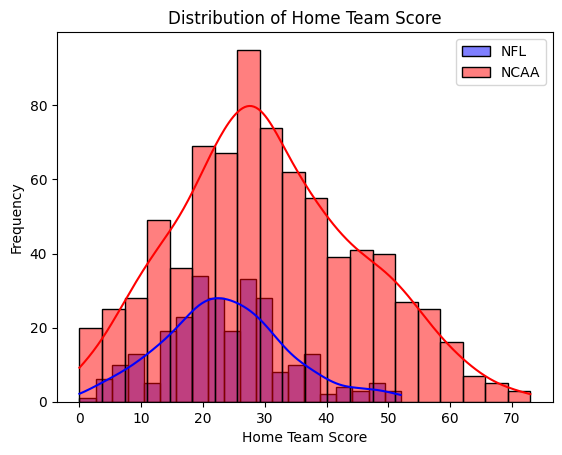

In [26]:
sns.histplot(nfl_df_data_common['home.score'], bins=20, kde=True, color='blue', label='NFL')
sns.histplot(ncaa_df_data_common['home.score'], bins=20, kde=True, color='Red', label='NCAA')
plt.legend()
plt.xlabel('Home Team Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Score')
plt.show()

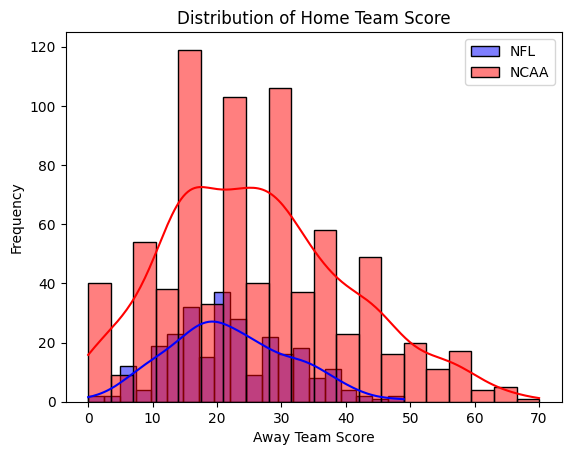

In [27]:
sns.histplot(nfl_df_data_common['away.score'], bins=20, kde=True, color='blue', label='NFL')
sns.histplot(ncaa_df_data_common['away.score'], bins=20, kde=True, color='Red', label='NCAA')
plt.legend()
plt.xlabel('Away Team Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Score')
plt.show()

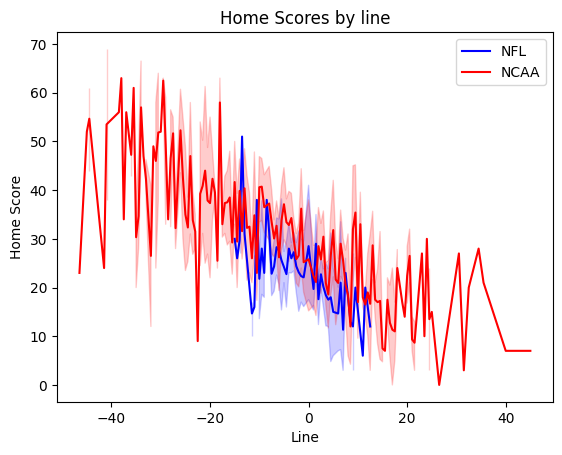

In [64]:
sns.lineplot(x='line', y='home.score', data=nfl_df_data_common, color='blue', label='NFL')
sns.lineplot(x='line', y='home.score', data=ncaa_df_data_common, color='red', label='NCAA')

plt.legend()
plt.title('Home Scores by line')
plt.xlabel('Line')
plt.ylabel('Home Score')
plt.show()